In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
x, y, z = symbols('x y z')

If f(x) is a continous function on an interval [a, b] and where sign(f(a)) != sign(f(b)), then f(x) = 0 have on an interval [a, b] at least one root.

Define equation to solve:

In [2]:
def func(x):
    return x ** 3 - log(x + 1)

In [3]:
func(x)

x**3 - log(x + 1)

Let's see graphic to define initial approximation:

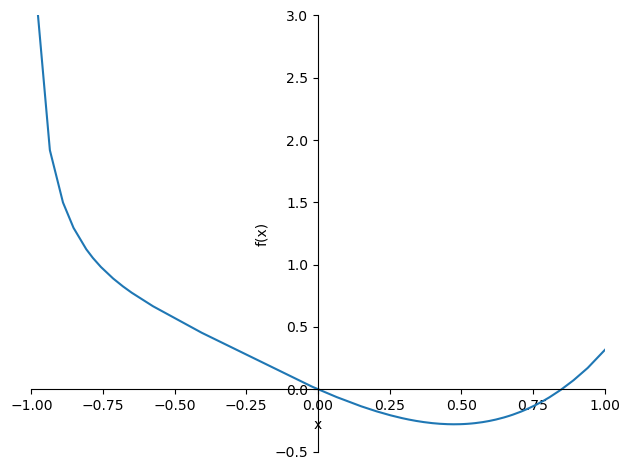

In [121]:
p1 = plot(func(x), show=True, xlim=(-1., 1.), ylim=(-.5, 3.))

So, initialize a = 0.5, b = 1.0:

In [122]:
a = float(.5)
b = float(1.)
cnt = int(0)
c = (a + b) / 2
epsilon = 0.0001

In [123]:
a_hist = []
b_hist = []
c_hist = []

We use $2 * \varepsilon $ in checking loop end because:

$$
|C_{k+1} - x^*| < \frac{b_{k+1} - a_{k+1}} {2} < \varepsilon\,
$$

In [124]:
while b - a > 2 * epsilon:

    if func(a) * func(c) < 0:
        b = (a + b) / 2

    elif func(b) * func(c) < 0:
        a = (a + b) / 2

    b_hist.append(b)
    a_hist.append(a)
    c = (a + b) / 2
    c_hist.append(c)
    cnt += 1

In [125]:
d = {'num iter': [i for i in range(cnt)], 'a': a_hist, 'b': b_hist, 'F(a)': [func(a) for a in a_hist],
     'F(b)': [func(b) for b in b_hist], 'c': c_hist, 'F(c)': [func(c) for c in c_hist],
     'b - a / 2': ((np.asarray(b_hist) - np.asarray(a_hist)) / 2)}

In [126]:
hist = pd.DataFrame(data=d)
hist

,num iter,a,b,F(a),F(b),c,F(c),b - a / 2
0,0,0.750000,1.000000,-0.137740787935423,0.306852819440055,0.875000,0.0413132155776259,0.125000
1,1,0.750000,0.875000,-0.137740787935423,0.0413132155776259,0.812500,-0.0583301546216928,0.062500
2,2,0.812500,0.875000,-0.0583301546216928,0.0413132155776259,0.843750,-0.0111240508716179,0.031250
3,3,0.843750,0.875000,-0.0111240508716179,0.0413132155776259,0.859375,0.0144298478165018,0.015625
4,4,0.843750,0.859375,-0.0111240508716179,0.0144298478165018,0.851562,0.00148807093512071,0.007812
5,5,0.843750,0.851562,-0.0111240508716179,0.00148807093512071,0.847656,-0.00485902744361444,0.003906
6,6,0.847656,0.851562,-0.00485902744361444,0.00148807093512071,0.849609,-0.00169575879455397,0.001953
7,7,0.849609,0.851562,-0.00169575879455397,0.00148807093512071,0.850586,-0.000106416711635471,0.000977
8,8,0.850586,0.851562,-0.000106416711635471,0.00148807093512071,0.851074,0.000690183585382198,0.000488
9,9,0.850586,0.851074,-0.000106416711635471,0.000690183585382198,0.850830,0.000291722596644450,0.000244
